In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as p

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [51]:
cases=pd.read_csv('cases.csv')
cases.head()

,Subject,Account Tier,Priority,Case Owner,Case Number,Date/Time Closed,Date/Time Opened,Date/Time Resolved,Age (Days),Open,Closed,Account Name
0,"revenueAdd(6713) failing with ""Error: java.lan...",Premium,4,Daisy Vincent,267737.0,1/6/2016 1:47 PM,1/4/2016 12:07 AM,1/6/2016 1:47 PM,3.0,0.0,1.0,Citroen UK
1,Deleting bidding folders for over 7 days,NaN,4,Alexander Ulrich,267746.0,NaN,1/4/2016 7:17 AM,1/4/2016 11:11 AM,240.0,1.0,0.0,NaN
2,Fwd: Marin | GA Auto tagging,Premium,4,Mickael Pineau,267748.0,1/5/2016 4:42 PM,1/4/2016 8:21 AM,1/5/2016 4:42 PM,1.0,0.0,1.0,Ocean Park
3,Revenus manquants 03/01/2016,Premium,5,Mickael Pineau,267751.0,1/6/2016 11:57 AM,1/4/2016 9:05 AM,1/6/2016 11:57 AM,2.0,0.0,1.0,LeGuide.com FR
4,Bulk Smart Sync request,Premium,5,Sean Higgins,267752.0,1/14/2016 4:32 PM,1/4/2016 9:36 AM,1/14/2016 4:32 PM,10.0,0.0,1.0,Hotels.com


In [4]:
cases.dtypes

Subject                object
Account Tier           object
Priority               object
Case Owner             object
Case Number           float64
Date/Time Closed       object
Date/Time Opened       object
Date/Time Resolved     object
Age (Days)            float64
Open                  float64
Closed                float64
Account Name           object
dtype: object

In [50]:
%timeit pd.to_datetime(cases['Date/Time Opened'],infer_datetime_format=True)

The slowest run took 4.47 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 64.9 µs per loop


In [53]:
cases['Date/Time Opened']=pd.to_datetime(cases['Date/Time Opened'],infer_datetime_format=True)
cases['Date/Time Opened']

0      2016-01-04 00:07:00
1      2016-01-04 07:17:00
2      2016-01-04 08:21:00
3      2016-01-04 09:05:00
4      2016-01-04 09:36:00
5      2016-01-04 09:54:00
6      2016-01-04 09:59:00
7      2016-01-04 10:05:00
8      2016-01-04 10:51:00
9      2016-01-04 10:53:00
10     2016-01-04 12:20:00
11     2016-01-04 12:23:00
12     2016-01-04 12:40:00
13     2016-01-04 12:40:00
14     2016-01-04 12:53:00
15     2016-01-04 13:26:00
16     2016-01-04 13:33:00
17     2016-01-04 13:48:00
18     2016-01-04 14:14:00
19     2016-01-04 14:41:00
20     2016-01-04 15:07:00
21     2016-01-04 15:49:00
22     2016-01-04 15:50:00
23     2016-01-04 15:57:00
24     2016-01-04 15:59:00
25     2016-01-04 16:10:00
26     2016-01-04 16:41:00
27     2016-01-04 17:02:00
28     2016-01-04 17:17:00
29     2016-01-05 08:39:00
               ...        
5547   2016-08-30 14:37:00
5548   2016-08-30 16:54:00
5549   2016-08-30 17:08:00
5550   2016-08-30 18:31:00
5551   2016-08-30 20:00:00
5552   2016-08-31 00:15:00
5

In [49]:
monthly_view = cases.groupby([cases['Date/Time Opened'].dt.month, cases['Account Tier']]).count()
monthly_view

Subject  Priority  Case Owner  Case Number  \
Date/Time Opened Account Tier                                                  
1.0              Advanced              93        10          93           93   
                 Enterprise Lite        1         0           1            1   
                 Premium              181        23         181          181   
                 Pro                   22         1          22           22   
                 Pro Platinum          12         1          12           12   
                 Standard             111        17         111          111   
2.0              Advanced              88         0          88           88   
                 Enterprise Lite        1         0           1            1   
                 Premium              280         5         280          280   
                 Pro                   16         0          16           16   
                 Pro Platinum           9         0           9            9   
                 Standard             184        14         185          185   
3.0              Advanced             121         2         122          122   
                 Premium              291        10         292          292   
                 Pro                   32         1          32           32   
                 Pro Platinum          13         0          13           13   
                 Standard             192        11         194          194   
4.0              Advanced             101         3         101          101   
                 Premium              295        11         295          295   
                 Pro                   22         0          22           22   
                 Pro Platinum          17         0          17           17   
                 Standard             181        14         181          181   
5.0              Advanced             111         4         111          111   
                 Enterprise Lite        1         0           1            1   
                 Premium              340        57         341          341   
                 Pro                   24         5          24           24   
                 Pro Enhanced           2         0           2            2   
                 Pro Platinum          14         0          14           14   
                 Standard             229        82         230          230   
6.0              Advanced             104        11         104          104   
                 Enterprise Lite        1         0           1            1   
                 Premium              335        94         335          335   
                 Pro                   42        21          42           42   
                 Pro Enhanced           1         0           1            1   
                 Pro Platinum          14         0          14           14   
                 Standard             235        95         235          235   
7.0              Advanced              83        25          83           83   
                 Enterprise Lite        5         3           5            5   
                 Premium              264        95         264          264   
                 Pro                   56        36          56           56   
                 Pro Enhanced           1         0           1            1   
                 Pro Platinum          12         0          12           12   
                 Standard             169        46         169          169   
8.0              Advanced              84        14          84           84   
                 Enterprise Lite        2         2           2            2   
                 Premium              255        60         256          256   
                 Pro                   41        18          41           41   
                 Pro Platinum           9         3           9            9   
                 Standard         

In [67]:
myteam = ['Alexander Ulrich','Mickael Pineau','Greg Ler','Sean Higgins','Fabien Lavaud','Justyna Schueler']
grouped_cases = cases.groupby(cases['Case Owner'].isin(myteam))
filtered_cases = grouped_cases.filter(lambda x:x['Closed'].sum >400)

owner_view = filtered_cases.groupby([cases['Case Owner'],cases['Date/Time Opened'].dt.month,cases['Account Tier']]).count()
owner_view


Subject  Account Tier  \
Case Owner            Date/Time Opened Account Tier                             
Aleks Nikitina        5.0              Premium                1             1   
                                       Standard               5             5   
                      7.0              Premium                1             1   
Alex Dixon            1.0              Premium                2             2   
                      2.0              Premium                1             1   
Alexander Ulrich      1.0              Advanced              10            10   
                                       Enterprise Lite        1             1   
                                       Premium                9             9   
                                       Pro                    2             2   
                                       Standard               6             6   
                      2.0              Advanced               9             9   
                                       Enterprise Lite        1             1   
                                       Premium                9             9   
                                       Standard               9             9   
                      3.0              Advanced               9             9   
                                       Premium               29            29   
                                       Pro                    1             1   
                                       Pro Platinum           3             3   
                                       Standard              23            23   
                      4.0              Advanced               8             8   
                                       Premium               22            22   
                                       Pro Platinum           1             1   
                                       Standard              14            14   
                      5.0              Advanced              14            14   
                                       Premium               32            32   
                                       Pro                    2             2   
                                       Standard              26            26   
                      6.0              Advanced               7             7   
                                       Premium               16            16   
                                       Pro Platinum           1             1   
...                                                         ...           ...   
Sean Higgins          6.0              Standard              23            23   
                      7.0              Advanced               7             7   
                                       Enterprise Lite        1             1   
                                       Premium               23            23   
                                       Pro                    6             6   
                                       Pro Platinum           3             3   
                                       Standard              26            26   
                      8.0              Advanced               2             2   
                                       Premium               13            13   
                                       Pro                    3             3   
                                       Standard               5             5   
Simona Serena         1.0              Premium                1             1   
                                       Standard               1             1   
                      3.0              Advanced               1             1   
                                       Standard               1             1   
                      4.0              Standard               2             2   
Sophie Wassermann     1.0              Advanced               1             1   
      

In [54]:
owner_monthly_view = cases.groupby([cases['Date/Time Opened'].dt.month, cases['Case Owner']]).count
owner_monthly_view

<bound method DataFrameGroupBy.count of <pandas.core.groupby.DataFrameGroupBy object at 0x10e4886d0>>

In [32]:
monthly_view.index.names=['Month','Tier']
monthly_view

Subject  Priority  Case Owner  Case Number  \
Month Tier                                                          
1.0   Advanced              93        10          93           93   
      Enterprise Lite        1         0           1            1   
      Premium              181        23         181          181   
      Pro                   22         1          22           22   
      Pro Platinum          12         1          12           12   
      Standard             111        17         111          111   
2.0   Advanced              88         0          88           88   
      Enterprise Lite        1         0           1            1   
      Premium              280         5         280          280   
      Pro                   16         0          16           16   
      Pro Platinum           9         0           9            9   
      Standard             184        14         185          185   
3.0   Advanced             121         2         122          122   
      Premium              291        10         292          292   
      Pro                   32         1          32           32   
      Pro Platinum          13         0          13           13   
      Standard             192        11         194          194   
4.0   Advanced             101         3         101          101   
      Premium              295        11         295          295   
      Pro                   22         0          22           22   
      Pro Platinum          17         0          17           17   
      Standard             181        14         181          181   
5.0   Advanced             111         4         111          111   
      Enterprise Lite        1         0           1            1   
      Premium              340        57         341          341   
      Pro                   24         5          24           24   
      Pro Enhanced           2         0           2            2   
      Pro Platinum          14         0          14           14   
      Standard             229        82         230          230   
6.0   Advanced             104        11         104          104   
      Enterprise Lite        1         0           1            1   
      Premium              335        94         335          335   
      Pro                   42        21          42           42   
      Pro Enhanced           1         0           1            1   
      Pro Platinum          14         0          14           14   
      Standard             235        95         235          235   
7.0   Advanced              83        25          83           83   
      Enterprise Lite        5         3           5            5   
      Premium              264        95         264          264   
      Pro                   56        36          56           56   
      Pro Enhanced           1         0           1            1   
      Pro Platinum          12         0          12           12   
      Standard             169        46         169          169   
8.0   Advanced              84        14          84           84   
      Enterprise Lite        2         2           2            2   
      Premium              255        60         256          256   
      Pro                   41        18          41           41   
      Pro Platinum           9         3           9            9   
      Standard             164        48         164          164   

                       Date/Time Closed  Date/Time Opened  Date/Time Resolved  \
Month Tier                                                                      
1.0   Advanced                       51                93                  91   
      Enterprise Lite                 0                 1                   1   
      Premium                       116               181                 178   
      Pro                            10                22                  22   
      Pro Platinu

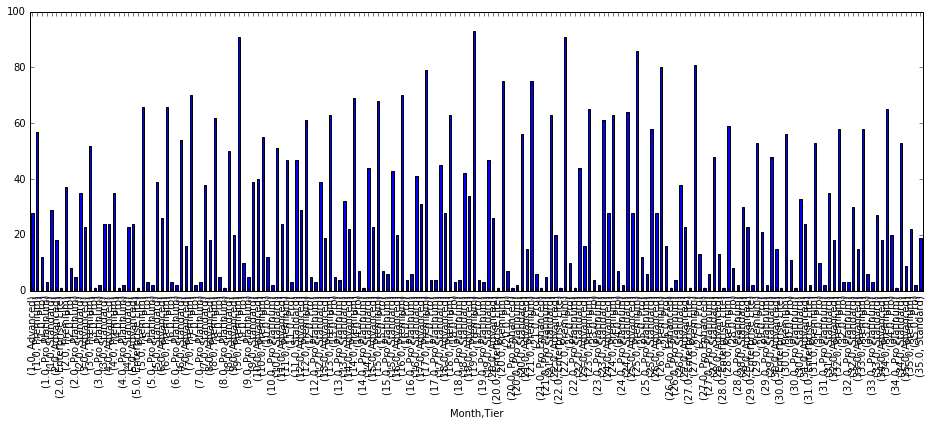

In [23]:
monthly_view['Date/Time Opened'].plot.bar(figsize=(16,5))
p.show()

In [33]:
unstacked_view = monthly_view['Date/Time Opened'].unstack()
unstacked_view

Tier,Advanced,Enterprise Lite,Premium,Pro,Pro Enhanced,Pro Platinum,Standard
Month,,,,,,,
1.0,93.0,1.0,181.0,22.0,NaN,12.0,111.0
2.0,88.0,1.0,280.0,16.0,NaN,9.0,185.0
3.0,122.0,NaN,292.0,32.0,NaN,13.0,194.0
4.0,101.0,NaN,295.0,22.0,NaN,17.0,181.0
5.0,111.0,1.0,341.0,24.0,2.0,14.0,230.0
6.0,104.0,1.0,335.0,42.0,1.0,14.0,235.0
7.0,83.0,5.0,264.0,56.0,1.0,12.0,169.0
8.0,84.0,2.0,256.0,41.0,NaN,9.0,164.0


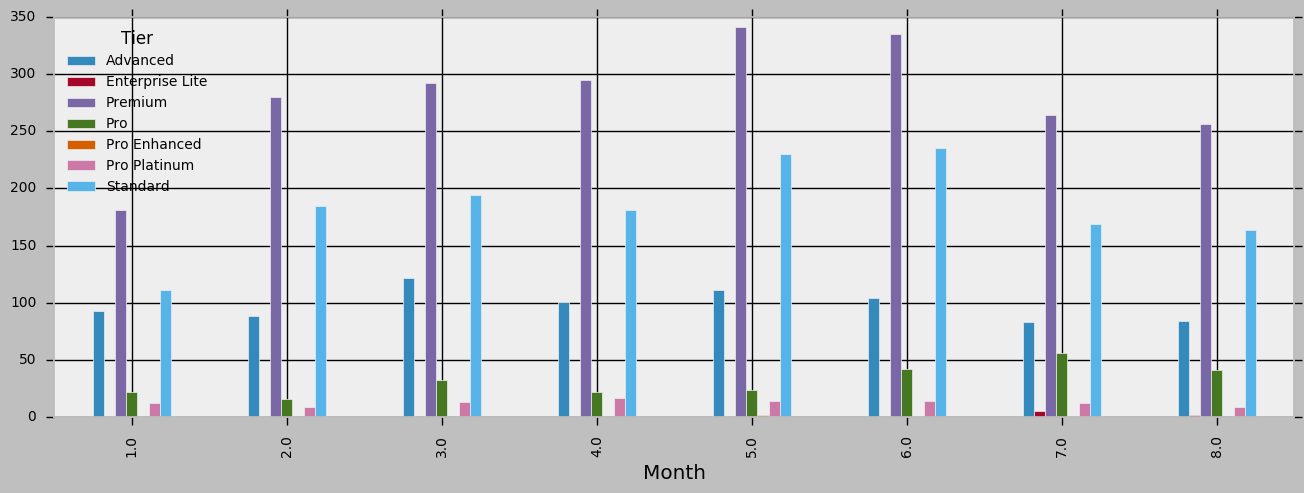

In [41]:
p.style.use('bmh')
unstacked_view.plot.bar(figsize=(16,5))
p.show()